<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/22/Logo_exactas.svg/800px-Logo_exactas.svg.png" alt="Logo Exactas UBA" style="width:100px;">
<img src="
https://ic.fcen.uba.ar/images/logo.png" alt="Logo Instituto de Cálculo" style="width:100px;">

# TP 2 LDD: Futbol Analytics

## Integrantes: Joaquín Koifman y Tobías Palacín Roitbarg

In [22]:
# Importar librerías principales
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## 1. Preprocesamiento

In [7]:
# 1. Cargar en un DataFrame los datos del archivo FBRef2020-21.csv.
data_futbol = pd.read_csv('FBRef2020-21.csv')
data_futbol.head()

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,PrgDistCarry/90,ProgCarry/90,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90
0,Patrick van Aanholt,nl NED,DF,Crystal Palace,eng Premier League,29.0,1990.0,22,20,1777,...,96.8,5.79,1.52,0.46,0.66,0.81,42.3,39.3,92.8,2.34
1,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,32.0,1987.0,33,33,2889,...,130.5,1.81,0.25,0.03,0.25,0.47,43.8,42.5,97.0,0.22
2,Pape Abou Cisse,sn SEN,DF,Saint-Étienne,fr Ligue 1,24.0,1995.0,14,14,1260,...,117.9,1.14,0.07,0.00,0.14,0.07,33.7,32.9,97.7,0.00
3,David Abraham,ar ARG,DF,Eint Frankfurt,de Bundesliga,34.0,1986.0,14,14,1222,...,92.7,3.24,0.66,0.00,0.22,0.00,34.8,33.4,96.0,0.59
4,Francesco Acerbi,it ITA,DF,Lazio,it Serie A,32.0,1988.0,32,32,2813,...,166.3,3.71,1.02,0.03,0.45,0.26,50.9,49.5,97.3,0.70


In [8]:
# 2. Eliminar a los jugadores que jugaron menos de 500 minutos en la temporada (columna Min).
data_futbol.drop(data_futbol[(data_futbol['Min'] < 500)].index, inplace=True)

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,PrgDistCarry/90,ProgCarry/90,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90
0,Patrick van Aanholt,nl NED,DF,Crystal Palace,eng Premier League,29.0,1990.0,22,20,1777,...,96.8,5.79,1.52,0.46,0.66,0.81,42.3,39.3,92.8,2.34
1,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,32.0,1987.0,33,33,2889,...,130.5,1.81,0.25,0.03,0.25,0.47,43.8,42.5,97.0,0.22
2,Pape Abou Cisse,sn SEN,DF,Saint-Étienne,fr Ligue 1,24.0,1995.0,14,14,1260,...,117.9,1.14,0.07,0.00,0.14,0.07,33.7,32.9,97.7,0.00
3,David Abraham,ar ARG,DF,Eint Frankfurt,de Bundesliga,34.0,1986.0,14,14,1222,...,92.7,3.24,0.66,0.00,0.22,0.00,34.8,33.4,96.0,0.59
4,Francesco Acerbi,it ITA,DF,Lazio,it Serie A,32.0,1988.0,32,32,2813,...,166.3,3.71,1.02,0.03,0.45,0.26,50.9,49.5,97.3,0.70


In [15]:
# 3. Eliminar los datos faltantes. Por ejemplo, eliminar columnas con más de 100 datos faltantes y luego las filas con datos faltantes, o convertir los datos faltantes a algún valor apropiado.
data_futbol.dropna(axis=1, thresh=len(data_futbol) - 100, inplace=True)
data_futbol.dropna(inplace=True)

1962
1902


In [16]:
#4. Al finalizar la limpieza de datos, resetear los índices.
data_futbol.reset_index(drop=True, inplace=True)

In [19]:
# 5. Definir el DataFrame data_num que solo contenga las variables númericas, a partir de la columna Ast/90, inclusive. 
print(data_futbol.columns)
data_num = data_futbol.select_dtypes(include='number').loc[:, 'Ast/90':]
data_num.head()


Index(['Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP',
       'Starts', 'Min',
       ...
       'PrgDistCarry/90', 'ProgCarry/90', 'CarryIntoThird/90',
       'CarryIntoBox/90', 'Miscontrol/90', 'Dispossessed/90', 'PassTarget/90',
       'PassesReceived/90', 'PassRec%', 'ProgPassReceived/90'],
      dtype='object', length=122)


,Ast/90,npG/90,npG+A/90,xA/90,npxG/90,npxG+xA/90,Shots/90,SoTs/90,FKSht/90,np:G-xG,...,PrgDistCarry/90,ProgCarry/90,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90
0,0.05,0.00,0.05,0.04,0.06,0.10,0.91,0.30,0.15,-0.06,...,96.8,5.79,1.52,0.46,0.66,0.81,42.3,39.3,92.8,2.34
1,0.00,0.09,0.09,0.01,0.05,0.06,0.47,0.16,0.00,0.04,...,130.5,1.81,0.25,0.03,0.25,0.47,43.8,42.5,97.0,0.22
2,0.00,0.00,0.00,0.00,0.08,0.09,0.93,0.21,0.00,-0.09,...,117.9,1.14,0.07,0.00,0.14,0.07,33.7,32.9,97.7,0.00
3,0.00,0.07,0.07,0.03,0.05,0.08,0.66,0.15,0.00,0.02,...,92.7,3.24,0.66,0.00,0.22,0.00,34.8,33.4,96.0,0.59
4,0.03,0.00,0.03,0.03,0.03,0.06,0.26,0.00,0.00,-0.03,...,166.3,3.71,1.02,0.03,0.45,0.26,50.9,49.5,97.3,0.70


## 2. Clustering

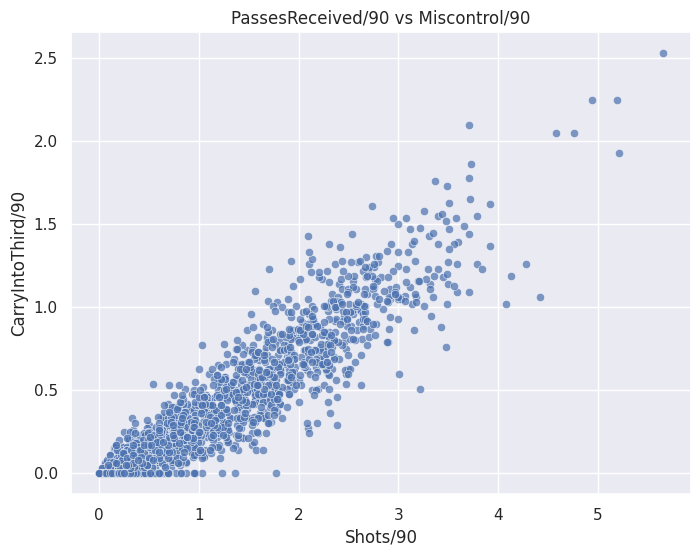

In [26]:
# Scatterplot de tiros de un jugador en los 90' vs los tiros a puerta en los 90'
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data_num, x='Shots/90', y='SoTs/90', alpha=0.7)
plt.title('PassesReceived/90 vs Miscontrol/90')
plt.xlabel('Shots/90')
plt.ylabel('CarryIntoThird/90')
plt.show()
